## Visual Computing in the Life Sciences

Assignment Sheet 2

### Group member: Dingming Liu, Faiza Khurshid, Danqi Wang

## Exercise 1 (Images in k-Space, 20 Points)

### a) Write a Python script to display the logarithmic power spectrum of arbitrary grayscale images. In particular, your script should read an image (whose name is given as a command-line argument), transform it into k-space, compute the squared magnitude of the complex number at each location, take the logarithm, and display the result as an image. Please make proper use of the so-called FFT shift to ensure that the center of k-space (zero spatial frequency) is displayed at the center of the final image, as shown in Fig. 1. (6P)

In [15]:
from PIL import Image
from scipy.fftpack import fft2,fftshift
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def k_space(imgPath):
    #load image
    img = Image.open(imgPath)
    #do the Fourier transform
    ft = fftshift(fft2(img))
    #compute the squared magnitude of the complex number at each location
    square = abs(ft) ** 2
    #take the logarithm
    log=10 * np.log10(square)
    return log

(220, 256)


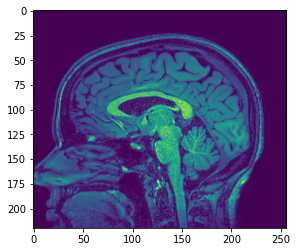

In [25]:
path='C:/Users/Administrator/Desktop/vclsi/assignments/02/brain.png'
#k_space(path)

image=np.array(Image.open(path))
print(image.shape)
plt.imshow(image)

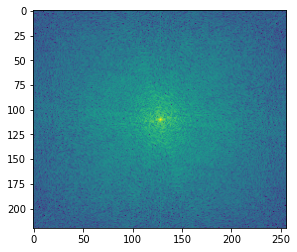

In [22]:
#show image
plt.imshow(k_space(path))

### b) Briefly explain why we cannot reconstruct an image from the power spectrum alone. What information is missing? (1P)

Phase position information is missing in a power spectrum.

### c) How does the Nyquist limit relate this sampling frequency to the bandwidth B above? (1P) Compute the resulting value of FOVx. (1P) 

f>=2B(max), sampling frequency must be greater or equal to twice of the maximum of bandwidth. Thus FOV=2(pi)f/(γG)

### Figure 2 shows a typical MR artifact that occurs when an object inside the scanner is outside the planned FOV. Briefly describe what happens, and explain why. (1P)  

The nose of the patient is out of field of view, but it occurs on the image at the back of the head of the patient. 

It is because the nose is out of FOV but within the recieving range of the coils. So there appears a phase difference.

### What can be done to increase the FOV of an MR image? (1P)

To adjust the bandwith. Increasing the bandwith can increase the FOV. (I think?)

### How can we compute the spatial resolution of the resulting MR image, i.e., the width of a voxel in x direction? (1P)

width of FOV(on x direction) / number of columns of (reconstrution) matrix

### d) Some MR protocols only fill a rectangle at the center of k-space with measured values, and leave the rest of k-space empty (i.e., at zero values). Argue based on what you learned about Fourier analysis how the image that results from such "zero-padding" compares to one for which only the measured part of k-space has been used for reconstruction (3P).

The center of k-space contains the low frequency information, the rest of the FOV is the high frequency region. There may be a resolution difference between these two results. I think that with the "zero-padding", the picture will be clearer (higher resolution).

## Exercise 2 (Magnetic Resonance Imaging, 4 Points)

Are the following statements true or false? Brieﬂy justify your answers.

a) Radio frequeny (RF) pulses in MRI are used to create a net macroscopic magnetization. (1P)

false. 
when excitation via resonant RF pulse -> deflection of net magnetization

b) Echo times (TE) in gradient recalled echo sequences are usually shorter than in spin echo sequences. (1P)

true.
as only one RF-pulse is applied, the echo can be recorded much more quickly in a GRE sequence.  As a result, echo time (TE) is generally shorter for GRE sequences 
than for Spin echo sequences.

c) We encode the three spatial dimensions of a volume during the readout of the MR signal. (1P)

false.
as in frequency encoding ,we make lamor frequency as function of one spatial coordinate

d) To acquire T1 and T2 weighted images in spin-echo sequences, the repetition time should be as short as possible. (1P)

false.

in spin-echo (SE) imaging, the repetition time (TR) and the echo time (TE) are used to control image contrast and the "weighting" of the MR image


Short TR/Short TE → T1-W

Long TR/Long TE → T2-W

long TR minimize T1 effect


## Exercise 3 (Affine Transformations, 8 Points)

a) Please write down the affine matrix that corresponds to first performing a non-uniform scaling by factor s along the z axis, followed by an xy shear (i.e., parallel to the x axis, with a magnitude depending on the y position) by factor β. (2P)

sacling.shear:
\begin{vmatrix}
1 & β & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & S & 0\\
0 & 0 & 0 & 1
\end{vmatrix}
    

b) Please write down the aﬃne matrix that corresponds to ﬁrst performing a translation by t along the x axis, followed by a rotation by angle α around the z axis. (2P)

combine both operation in single matrix

T.R:
\begin{vmatrix}
cosα & -sinα & 0 & t\\
sinα & cosα & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1
\end{vmatrix}

c) One of the two above-deﬁned transformations changes if we exchange the order of the two operations. Which one and why? (1P)

transformation for part(b) (translation, rotation ) will change by changing the order of operations

d) Write down a transformation matrix T for a two-dimensional image that performs a rotation around an arbitrary point p = (x, y) by angle θ. Include the steps for deriving matrix T in your solution. (3P)

three steps needed:

1-Translate point (Xp, Yp) to the origin. T1

2-Rotate it about the origin. R

3-translate the center of rotation back where it belongs. T2

$T_1.R.T_2=
\begin{vmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
-x_p & -y_p & 1
\end{vmatrix}\begin{vmatrix}
\cos\theta & \sin\theta & 0\\
-\sin\theta & \cos\theta & 0\\
0 & 0 & 1
\end{vmatrix}\begin{vmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
x_p & y_p & 1
\end{vmatrix}$

$T_1.R.T_2=\begin{vmatrix}
\cos\theta & \sin\theta & 0\\
-\sin\theta & \cos\theta & 0\\
-x_p\cos\theta+y_p\sin\theta & -x_p\sin\theta-y_p\cos\theta & 1
\end{vmatrix}\begin{vmatrix}
1 & 0 & 0\\
0 & 1 & 0\\
x_p & y_p & 1
\end{vmatrix}$

$T_1.R.T_2=\begin{vmatrix}
\cos\theta & \sin\theta & 0\\
-\sin\theta & \cos\theta & 0\\
-x_p\cos\theta+y_p\sin\theta+x_p & -x_p\sin\theta-y_p\cos\theta+y_p & 1
\end{vmatrix}$

## Exercise 4 (Image Registration, 18 Points)

Fig. 3 shows axial.png, a 2D slice of a brain MR scan, and axial_transformed.png, a translated and rotated version of the same slice. Both images are available from eCampus. Please take the following steps to develop a simple registration algorithm that brings them back into alignment:

a) Write a routine that can translate and rotate an input image by arbitrary amounts. Feel free to use the predeﬁned functions oﬀered by the package scipy.ndimage. (3P)

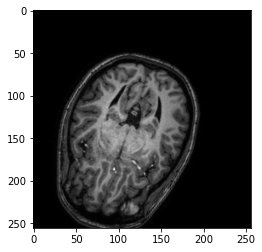

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import AffineTransform, warp

image = cv2.imread('/Users/wangdanqi/Desktop/axial.png',0)

def transform(m, n, beta):
    row, column = image.shape
    shifted = AffineTransform(scale = None, shear = None, rotation = np.deg2rad(beta), translation = (m,n))
    trans_image = warp(image, shifted.inverse)
    plt.imshow(trans_image, cmap=plt.cm.gray)
    plt.show()
    
    
if __name__ == '__main__':
    transform(30,-10,20)

b) Implement a routine that evaluates the L2 cost function for a pair of input images. Test it by creating a plot that shows the L2 cost as a function of translating axial.png in x and y direction, as well as rotating it, and comparing it to the unchanged image. (3P) Hint: In this example, it is safe to compute the cost over the ﬁxed image, and pad the moving image with zeros if needed. You do not have to treat partial overlaps.

In [ ]:
# use three cost function to calculate the optimal parameter.

the minnimum value of L2 cost function in the range: 2534.646637271803 356


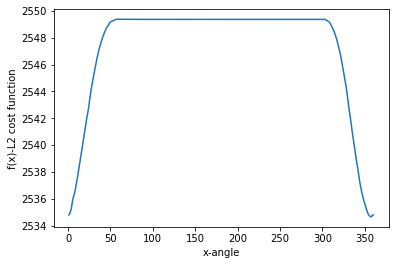

In [20]:
# looking for angle
fix_image = cv2.imread('/Users/wangdanqi/Desktop/axial_transformed.png',0)
row, column = image.shape

dot_list = []
for i in range(1,361):
    shifted = AffineTransform(scale=None, shear=None, rotation=np.deg2rad(i), translation=None)
    trans_image = warp(image, shifted.inverse)
    subtract_matrix = trans_image - fix_image
    cLS = (subtract_matrix * subtract_matrix).sum() / (row * column)# generate the L2 cost function.
    dot_list.append(cLS)
l_cost = min(dot_list)
point = dot_list.index(l_cost)


print('the minnimum value of L2 cost function in the range:', l_cost,point)

x = [i for i in range(1,361)]

y = dot_list
plt.plot(x, y)
plt.xlabel('x-angle')
plt.ylabel('f(x)-L2 cost function')
plt.show()

the minnimum value of L2 cost function in the range: 2533.169917297715 29


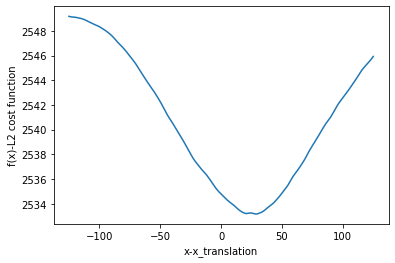

In [22]:
# looking for x-translation
dot_list = []
for i in range(-125,126):
    shifted = AffineTransform(scale=None, shear=None, rotation=None, translation=(i,0))
    trans_image = warp(image, shifted.inverse)
    subtract_matrix = trans_image - fix_image
    cLS = (subtract_matrix * subtract_matrix).sum() / (row * column)# generate the L2 cost function.
    dot_list.append(cLS)
l_cost = min(dot_list)
point = dot_list.index(l_cost)-125
print('the minnimum value of L2 cost function in the range:', l_cost, point)

x = [i for i in range(-125,126)]

y = dot_list
plt.plot(x, y)
plt.xlabel('x-x_translation')
plt.ylabel('f(x)-L2 cost function')
plt.show()

the minnimum value of L2 cost function in the range: 2534.150266961579 13


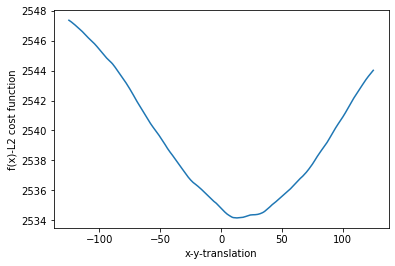

In [29]:
# looking for y-translation.
dot_list = []
for i in range(-125,126):
    shifted = AffineTransform(scale=None, shear=None, rotation=None, translation=(0,i))
    trans_image = warp(image, shifted.inverse)
    subtract_matrix = trans_image - fix_image
    cLS = (subtract_matrix * subtract_matrix).sum() / (row * column)# generate the L2 cost function.
    dot_list.append(cLS)
l_cost = min(dot_list)
point = dot_list.index(l_cost)-125
print('the minnimum value of L2 cost function in the range:', l_cost, point)

x = [i for i in range(-125,126)]

y = dot_list
plt.plot(x, y)
plt.xlabel('x-y-translation')
plt.ylabel('f(x)-L2 cost function')
plt.show()

c) Implement a simple optimization method based on the golden ratio rule that uses your routines for image transformation and cost function evaluation to correctly align axial_transformed.png back to axial.png. Please submit the code, the resulting image, and the parameters for translation and rotation that you found.

Write code that ﬁnds an initial bracket. (5P)

• Write code that, given a bracket, reﬁnes it until the bracket width is below some speciﬁed level of precision. (4P)

Use that code to iterate over alternating optimization of translation and rotation until convergence. (3P)

In [34]:
import sys
import math
#a = np.random.randint(1, 360)
#b = np.random.randint(a+1, 360)

def has_bracket(x, y):
    for i in range(x, y):
        if dot_list[i]< dot_list[x] and dot_list[i] < dot_list[y]:
            return True
        return False
        
def bracket(a, b):
    x = a+ (b-a)*0.38
    if has_bracket(x, b):
        return bracket(x, b) 
    elif math.abs(a-b) < sys.float_info.epsilon: #set specified level of precision
        return a
    else: 
        b_ = b+((b-a)/0.38)*0.62
        return bracket(b, b_)

has_bracket(0, 200)
                


False

In [18]:
def find_parameter():
    ''' use the value from bracket function to find optimal parameter. '''
    count = 0
    dot_list = []
    for i in range(15, 25):
        for m in range(60, 75):
            for n in range(-50, -40):
                shifted = AffineTransform(scale=None, shear=None, rotation=np.deg2rad(i), translation=(m, n))
                trans_image = warp(image, shifted.inverse)
                subtract_matrix = trans_image - fix_image
                cLS = (subtract_matrix * subtract_matrix).sum() / (row * column)
                dot_list.append(cLS)
                count += 1
                if count == bracket(a, b):
                    return m, n, i

The parameter of translation: (29, 13) and rotation angle is 356.